In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
#from anndata import AnnData
import scipy
#from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")


In [2]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), './'))
    
    #from pcNet import pcNet
    from main import *
    #import dNN 
    #from neighborhood import laplacian #for eigendecomp
except ImportError:
    print('Module not found')

In [3]:
ada = sc.read_h5ad("data/HCC_processed_v2.h5ad")
ada

AnnData object with n_obs × n_vars = 4096 × 2608
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral', 'ident', 'batch'
    var: 'gene_ids', 'n_cells'
    obsm: 'X_pca', 'X_umap'
    layers: 'log1p', 'raw'

In [4]:
#ada.obs.rename({'indent': 'ident'}, axis=1, inplace=True)

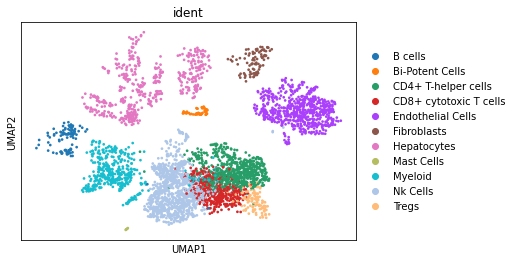

In [5]:
sc.pl.umap(ada, color='ident')

In [6]:
ada_N = ada[ada.obs['NormalvsTumor'] == 'N', :].copy()
ada_T = ada[ada.obs['NormalvsTumor'] == 'T', :].copy()
ada_N.shape, ada_T.shape

((2057, 2608), (2039, 2608))

In [7]:
ada_T.obs['ident'].value_counts()

Hepatocytes               462
CD4+ T-helper cells       422
CD8+ cytotoxic T cells    273
Endothelial Cells         272
Nk Cells                  221
Myeloid                   189
Tregs                      99
Fibroblasts                59
B cells                    39
Mast Cells                  2
Bi-Potent Cells             1
Name: ident, dtype: int64

In [8]:
ada_N.obs['ident'].value_counts()

Nk Cells                  801
Endothelial Cells         386
CD4+ T-helper cells       260
Myeloid                   225
CD8+ cytotoxic T cells    191
B cells                    65
Bi-Potent Cells            53
Fibroblasts                36
Tregs                      19
Hepatocytes                18
Mast Cells                  3
Name: ident, dtype: int64

## create a Xct_metrics obj:

In [9]:
skin = Xct_metrics(ada_T)
type(skin)

main.Xct_metrics

In [10]:
skin.DB.head()

,ligand,receptor
0,BDNF,TRPC1
1,CXCL12,GNAI2
2,PF4,GNAI2
3,EPOR,TRPC3
4,EPOR,EPO


In [11]:
skin._genes_index_DB

array([[   0,    0],
       [1545,    0],
       [   0,    0],
       ...,
       [   0,    0],
       [   0,    0],
       [   0,    0]])

In [12]:
id1 = skin._genes_index_DB[1, 0]
ada.var_names[id1-1] #check

'CXCL12'

662 (intervals for fit) / 2589 (filtered -Inf) / 2608 (original) features for the fit


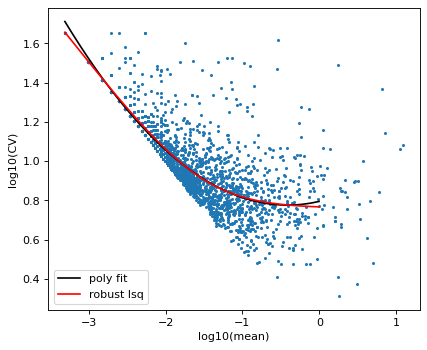

array([-0.16000512, -0.01295085, -0.01636886, ...,  0.07229543,
        0.06179799, -0.03898189])

In [13]:
skin.chen2016_fit(ada_T, plot = True, verbose = True)

## tumor:

In [14]:
# obj1 = Xct(ada_T, 'Hepatocytes', 'Endothelial Cells', build_GRN = True, save_GRN = True, 
#           pcNet_name = 'Net_Hep2Endo_T', mode = 'full', verbose=True)

obj1 = Xct(ada_T, 'Hepatocytes', 'Endothelial Cells', build_GRN = False,
           pcNet_name = 'Net_Hep2Endo_T', mode = 'full', verbose=True)

print(obj1)

init an Xct object for interactions from Hepatocytes (462) to Endothelial Cells (272)...
loading GRNs...
building correspondence...
init completed.
Xct object with the interaction between cells Hepatocytes X Endothelial Cells = 462 X 272
# of genes = 2608 X 2608 
Correspondence = 5216 X 5216


In [15]:
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
186,NID1,PTPRF,0.033262,0.005097,0.025957,0.003507,0.780388,0.688052,4.843746,11.618962,-0.012730,-0.022462
271,IL1B,PLAUR,0.001500,0.036930,0.001038,0.032931,0.691649,0.891718,21.470945,4.913868,0.006375,0.066800
274,KNG1,PLAUR,0.523149,0.036930,0.689779,0.032931,1.318514,0.891718,1.587558,4.913868,0.094586,0.066800
275,VTN,PLAUR,1.317913,0.036930,2.115814,0.032931,1.605428,0.891718,1.103703,4.913868,-0.050679,0.066800
276,PLG,PLAUR,0.148717,0.036930,0.169688,0.032931,1.141013,0.891718,2.769904,4.913868,0.038519,0.066800
...,...,...,...,...,...,...,...,...,...,...,...,...
7967,ANGPTL4,GPIHBP1,0.092515,0.040536,0.083921,0.033514,0.907107,0.826763,3.131294,4.516161,-0.032411,0.043657
7979,S100A8,CD68,0.001500,0.005097,0.001038,0.003507,0.691651,0.688052,21.470982,11.618963,0.006375,-0.022462
7980,S100A9,CD68,0.055646,0.005097,0.113773,0.003507,2.044574,0.688052,6.061553,11.618963,0.349656,-0.022462
7984,TF,TFR2,0.697570,0.002548,0.913951,0.001760,1.310194,0.690599,1.370484,16.462086,0.077224,-0.017941


In [16]:
df1[df1.ligand == 'VEGFA']

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
431,VEGFA,PDGFRB,0.095856,0.002548,0.073731,0.001760,0.769181,0.690599,2.832723,16.462082,-0.096689,-0.017941
724,VEGFA,KIT,0.095856,0.006587,0.073731,0.006160,0.769181,0.935170,2.832723,11.914883,-0.096689,0.084967
913,VEGFA,ERBB2,0.095856,0.005097,0.073731,0.003507,0.769181,0.688053,2.832723,11.618970,-0.096689,-0.022462
979,VEGFA,KDR,0.095856,0.213294,0.073731,0.156643,0.769181,0.734399,2.832723,1.855568,-0.096689,-0.099757
1355,VEGFA,PDGFB,0.095856,0.072607,0.073731,0.059352,0.769181,0.817443,2.832723,3.355367,-0.096689,0.027716
2048,VEGFA,INSR,0.095856,0.367404,0.073731,0.318716,0.769181,0.867481,2.832723,1.536591,-0.096689,-0.034201
2134,VEGFA,FLT1,0.095856,0.340695,0.073731,0.278032,0.769181,0.816073,2.832723,1.547683,-0.096689,-0.119636
2473,VEGFA,FGFR3,0.095856,0.010193,0.073731,0.006962,0.769181,0.682954,2.832723,8.185355,-0.096689,-0.031328
2676,VEGFA,FLT4,0.095856,0.050342,0.073731,0.037273,0.769181,0.740395,2.832723,3.835007,-0.096689,-0.040448
2915,VEGFA,TIE1,0.095856,0.160266,0.073731,0.126054,0.769181,0.786526,2.832723,2.215314,-0.096689,-0.066181


## mode 'full':

In [17]:
obj1._net_A.shape, obj1._net_B.shape, obj1._w.shape #check

((2608, 2608), (2608, 2608), (5216, 5216))

In [18]:
w12 = obj1._w[:obj1._net_A.shape[0], obj1._net_A.shape[1]:]

np.mean(w12) # check scale

1.0006780914767335

In [19]:
#selected LR pairs
candidates = obj1._candidates(df1)
print(len(candidates))
candidates[:5]

314


['NID1_PTPRF', 'IL1B_PLAUR', 'KNG1_PLAUR', 'VTN_PLAUR', 'PLG_PLAUR']

Net(
  (linear1): Linear(in_features=462, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=30, bias=True)
  (linear3): Linear(in_features=30, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=272, out_features=92, bias=True)
  (linear2): Linear(in_features=92, out_features=23, bias=True)
  (linear3): Linear(in_features=23, out_features=2, bias=True)
)
0 4946.7841796875
99 845.6993408203125
199 770.7957153320312
299 740.6891479492188
399 726.9246826171875
499 720.6325073242188
599 717.4810791015625
699 715.7620239257812
799 714.7348022460938
899 714.0673217773438
999 713.6057739257812
1099 713.2804565429688
1199 713.059326171875
1299 712.861572265625
1399 712.7893676757812
1499 712.610107421875
1599 712.5159301757812
1699 712.4443359375
1799 712.3712158203125
1899 713.4457397460938
1999 712.274169921875
2099 712.2296142578125
2199 713.1795654296875
2299 712.171875
2399 712.1336059570312
2499 713.8450927734375
2599 712.0955200195312
2699 712.

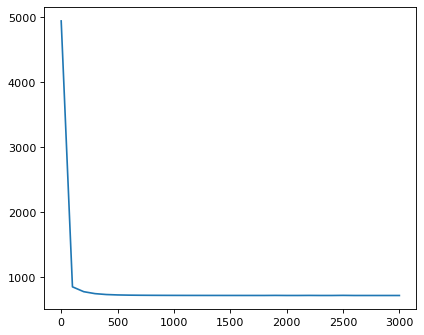

In [20]:
projections, losses = obj1.nn_projection(d = 2, n = 3000, lr = 0.001, plot_loss = True)

In [21]:
df_nn = obj1.nn_output(projections)
df_nn.head()

computing pair-wise distances...
manifold aligned # of pairs: 6801664
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
C4BPB_MTUS1,"(259, 1170)",1.274866e-07,1,53.744221
TFF2_AQP1,"(2593, 971)",2.493128e-06,2,57.532812
PON1_HSPG2,"(1010, 48)",3.249914e-06,3,66.492321
GATM_IFI27,"(1886, 1822)",3.491726e-06,4,220.167173
HES1_SPRY1,"(599, 688)",4.267159e-06,5,86.794276


In [22]:
# df_nn_to_output = df_nn.iloc[:1000, :]
# df_nn_to_output.to_csv('distances_nn_heart.csv')

[[ 1.         -0.16374489]
 [-0.16374489  1.        ]]


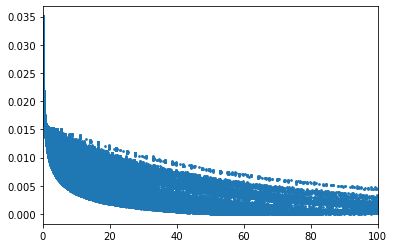

In [23]:
#check corr
select = df_nn['correspondence_score'] != 0
nX = np.asarray(df_nn['correspondence_score'][select])
nY = np.asarray(df_nn['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [24]:
df_nn_filtered = obj1.filtered_nn_output(df_nn, candidates)
df_nn_filtered.head()

manifold aligned # of L-R pairs: 314


,idx,dist,rank,correspondence_score,rank_filtered
PLA2G2A_ITGA5,"(42, 1671)",0.000073,761,75.928252,1
VTN_ITGA6,"(2114, 392)",0.000080,865,233.801718,2
APOE_APP,"(2457, 2576)",0.000288,4005,70.302411,3
KNG1_CDH5,"(594, 2026)",0.000310,4312,67.803958,4
VTN_ITGA5,"(2114, 1671)",0.000548,7798,291.588345,5


In [25]:
df_enriched = obj1.chi2_test(df_nn, df = 3, pval = 0.05, FDR = True, candidates = candidates)
df_enriched


Total enriched: 12 / 6801664


,idx,dist,rank,correspondence_score,q_val,rank_filtered
PLA2G2A_ITGA5,"(42, 1671)",0.000073,761,75.928252,0.000048,1
VTN_ITGA6,"(2114, 392)",0.000080,865,233.801718,0.000056,2
APOE_APP,"(2457, 2576)",0.000288,4005,70.302411,0.000568,3
KNG1_CDH5,"(594, 2026)",0.000310,4312,67.803958,0.000658,4
VTN_ITGA5,"(2114, 1671)",0.000548,7798,291.588345,0.002014,5
EFNA1_INSR,"(190, 2368)",0.000875,12317,40.864844,0.005173,6
KNG1_CD93,"(594, 2286)",0.000948,13350,104.656748,0.006076,7
EFNA1_FLT1,"(190, 1753)",0.001005,14143,36.422089,0.006842,8
VTN_KDR,"(2114, 638)",0.001052,14830,357.493320,0.007480,9
EFNA1_KDR,"(190, 638)",0.001871,26178,20.723358,0.023820,10


## mode 'combinators' and 'pairs':

In [26]:
# obj2 = Xct(ada_T, 'Hepatocytes', 'Endothelial Cells', build_GRN = False,
#            pcNet_name = 'Net_Hep2Endo_T', mode = 'comb', verbose=True)

In [27]:
# obj3 = Xct(ada_T, 'Hepatocytes', 'Endothelial Cells', build_GRN = False,
#            pcNet_name = 'Net_Hep2Endo_T', mode = 'pairs', verbose=True)

### adjacent normal

In [28]:
# obj11 = Xct(ada_N, 'Hepatocytes', 'Endothelial Cells', build_GRN = True, save_GRN = True, 
#           pcNet_name = 'Net_Hep2Endo_N', mode = 'full', verbose=True)


obj11 = Xct(ada_N, 'Hepatocytes', 'Endothelial Cells', build_GRN = False,
           pcNet_name = 'Net_Hep2Endo_N', mode = 'full', verbose=True)

print(obj11)

init an Xct object for interactions from Hepatocytes (18) to Endothelial Cells (386)...
loading GRNs...
building correspondence...
init completed.
Xct object with the interaction between cells Hepatocytes X Endothelial Cells = 18 X 386
# of genes = 2608 X 2608 
Correspondence = 5216 X 5216


In [29]:
df11 = obj11.fill_metric()
df11

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
274,KNG1,PLAUR,0.138050,0.113438,0.101378,0.103768,0.734358,0.914752,2.306403,2.839697,-0.001929,0.070885
275,VTN,PLAUR,0.495614,0.113438,0.467505,0.103768,0.943283,0.914752,1.379587,2.839697,0.100510,0.070885
276,PLG,PLAUR,0.077016,0.113438,0.047452,0.103768,0.616131,0.914752,2.828427,2.839697,-0.039549,0.070885
375,APOE,APP,0.276101,0.375405,0.164641,0.243506,0.596308,0.648649,1.469608,1.314482,-0.107860,-0.130097
393,IGF2,PDGFRB,0.099542,0.024354,0.083836,0.028555,0.842215,1.172486,2.908760,6.938555,0.052506,0.169175
...,...,...,...,...,...,...,...,...,...,...,...,...
7440,SAA1,SCARB1,0.381496,0.016161,0.363564,0.010941,0.952995,0.676988,1.580521,6.472172,0.015489,-0.040916
7442,APOE,SCARB1,0.276101,0.016161,0.164641,0.010941,0.596308,0.676988,1.469608,6.472172,-0.107860,-0.040916
7728,HP,ASGR1,1.230502,0.010774,1.034765,0.007352,0.840930,0.682373,0.826683,7.958228,0.091642,-0.034609
7967,ANGPTL4,GPIHBP1,0.038508,0.081515,0.025209,0.084282,0.654639,1.033951,4.123106,3.561491,-0.002437,0.090003


In [30]:
#selected LR pairs
candidates11 = obj11._candidates(df11)
print(len(candidates11))

101


Net(
  (linear1): Linear(in_features=18, out_features=24, bias=True)
  (linear2): Linear(in_features=24, out_features=6, bias=True)
  (linear3): Linear(in_features=6, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=386, out_features=108, bias=True)
  (linear2): Linear(in_features=108, out_features=27, bias=True)
  (linear3): Linear(in_features=27, out_features=2, bias=True)
)
0 5452.5517578125
99 972.3536376953125
199 787.4979248046875
299 634.6914672851562
399 583.382080078125
499 562.1445922851562
599 542.3226318359375
699 529.6512451171875
799 551.7852172851562
899 518.0818481445312
999 512.9979248046875
1099 509.4983215332031
1199 506.85479736328125
1299 504.80645751953125
1399 503.14666748046875
1499 501.9442138671875
1599 511.72113037109375
1699 499.9517822265625
1799 499.0657958984375
1899 498.40863037109375
1999 497.8044128417969
2099 498.28765869140625
2199 496.7872314453125
2299 496.3927001953125
2399 497.7103271484375
2499 495.5043029785156
2599 495.2524108

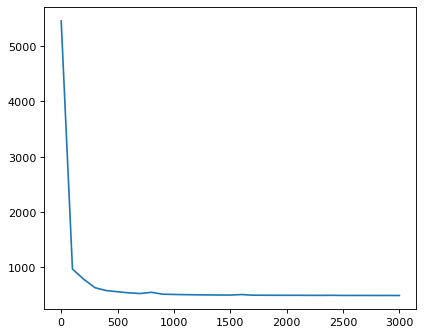

In [31]:
projections, losses = obj11.nn_projection(d = 2, n = 3000, lr = 0.001, plot_loss = True)

In [32]:
df_nn11 = obj11.nn_output(projections)
df_nn11.head()

computing pair-wise distances...
manifold aligned # of pairs: 6801664
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
SERPINA1_FBLN2,"(1825, 455)",0.000005,1,261.797169
FABP1_SERPING1,"(351, 1423)",0.000006,2,176.202753
GSTA1_PTPRB,"(898, 1697)",0.000010,3,126.198387
GAMT_EPAS1,"(2347, 329)",0.000010,4,117.025677
ANGPTL3_GSN,"(113, 1318)",0.000013,5,119.542451


In [33]:
df_enriched11 = obj11.chi2_test(df_nn11, df = 3, pval = 0.05, FDR = True, candidates = candidates11)
df_enriched11


Total enriched: 4 / 6801664


,idx,dist,rank,correspondence_score,q_val,rank_filtered
APOE_APP,"(2457, 2576)",0.000515,6233,58.374649,0.002054,1
SAA1_CD36,"(1401, 1002)",0.001433,17253,44.412965,0.016018,2
VTN_ITGA5,"(2114, 1671)",0.002051,24330,43.559440,0.033250,3
VTN_PLAUR,"(2114, 2449)",0.002366,28076,39.286373,0.044234,4
